### Import all the necessary libraries for EDA, Predictions and Analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go

# Load dataset
# pathSuperstore = r"C:\Users\sai22\Downloads\netflix_titles.csv"

df = pd.read_csv("/content/netflix_titles.csv")

# Display the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
null_count = df.isnull().sum()
null_count

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [3]:
# Explore the dataset
print(df.info())  # Check data types and null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [4]:
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [5]:
# Fill missing values
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')


In [8]:
import pandas as pd

# Assuming df is your DataFrame

# Splitting 'date_added' into 'year_added' and 'month_added'
df['year_added'] = df['date_added'].str.extract(r', (\d{4})$')   # Extract the year
df['month_added'] = df['date_added'].str.extract(r'^(\w+)')      # Extract the month

# Dropping the original 'date_added' column
df = df.drop(columns=['date_added'])

# Display the updated DataFrame
print(df.head())



  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                            Unknown            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021

In [9]:
# Get distinct 'year_added' values as a list
distinct_years = df['year_added'].dropna().unique().tolist()

# Alternatively, using `unique()`
distinct_years = df['year_added'].unique().tolist()

# Print the distinct years
print(distinct_years)


['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2009', '2008', nan, '2010']


In [10]:
distinct_type = df["type"].unique()
distinct_type

array(['Movie', 'TV Show'], dtype=object)

In [11]:
country_counts = (
    df["country"]
    .dropna()                # Remove NaN values
    .str.split(", ")         # Split by commas
    .explode()               # Flatten lists into rows
    .value_counts()          # Count occurrences
    .reset_index()           # Convert to DataFrame
)

country_counts.columns = ["country", "count"]  # Rename columns


<Figure size 1200x600 with 0 Axes>

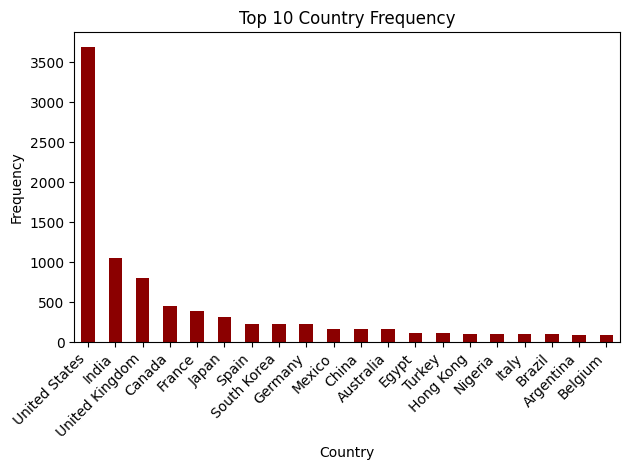

In [12]:
import matplotlib.pyplot as plt

# Get top 10 countries by count
top_20_countries = country_counts.sort_values(by="count", ascending=False).head(20)

# Plot the bar graph for top 20 countries
plt.figure(figsize=(12, 6))
top_20_countries.plot.bar(x="country", y="count", legend=False, color="darkred")
plt.title("Top 10 Country Frequency")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [13]:
# Convert duration into numeric (Movies: minutes; TV Shows: number of seasons)
def parse_duration(duration):
    if isinstance(duration, str):  # Check if the value is a string
        if 'min' in duration:
            return int(duration.replace(' min', ''))
        elif 'Season' in duration:
            return int(duration.split()[0])
    return np.nan  # Return NaN for missing or unexpected values

df['duration'] = df['duration'].apply(parse_duration)


<ipython-input-16-1842d773657c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_genres.index, y=top_20_genres.values, palette='viridis')


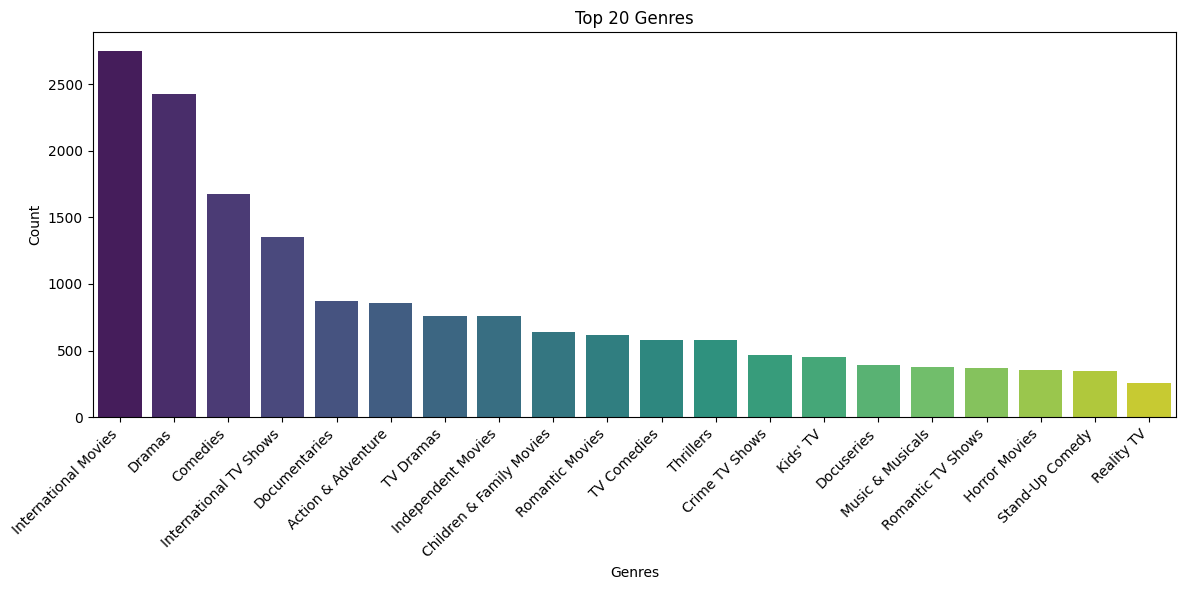

<ipython-input-16-1842d773657c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remaining_genres.index, y=remaining_genres.values, palette='coolwarm')


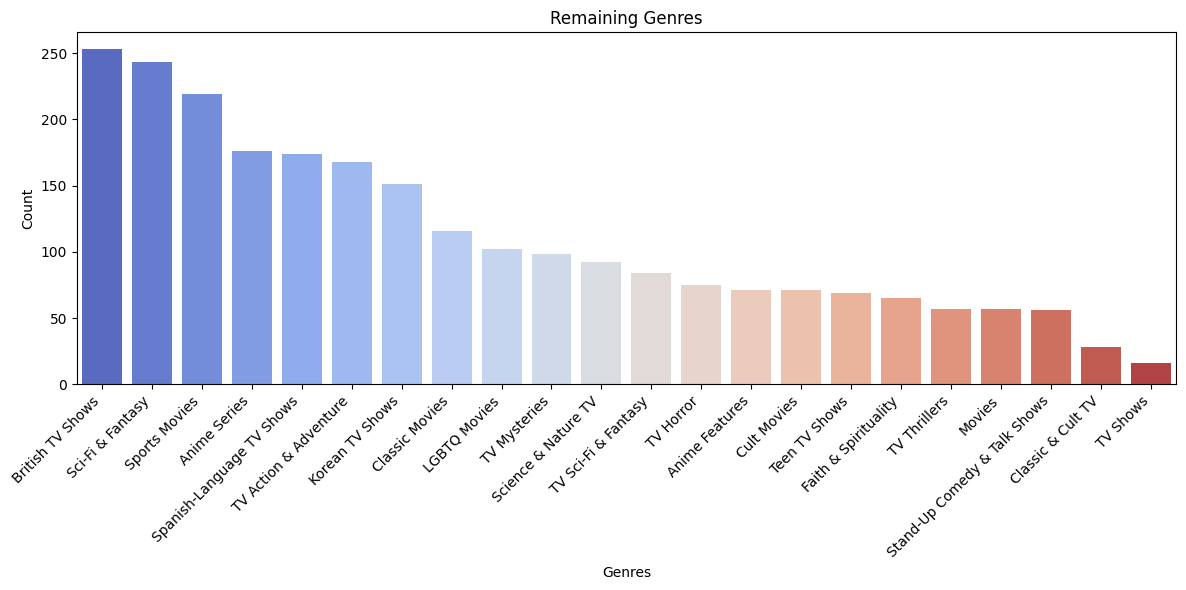

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'listed_in' is a column in the DataFrame `df`

# Split the 'listed_in' column into individual genres and create a new DataFrame
genres = df['listed_in'].str.get_dummies(sep=', ')

# Calculate genre counts
genre_counts = genres.sum().sort_values(ascending=False)

# Plot the top 20 genres
top_20_genres = genre_counts.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.index, y=top_20_genres.values, palette='viridis')
plt.title('Top 20 Genres')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Genres')
plt.tight_layout()
plt.show()

# Plot the remaining genres
remaining_genres = genre_counts.iloc[20:]
plt.figure(figsize=(12, 6))
sns.barplot(x=remaining_genres.index, y=remaining_genres.values, palette='coolwarm')
plt.title('Remaining Genres')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Genres')
plt.tight_layout()
plt.show()


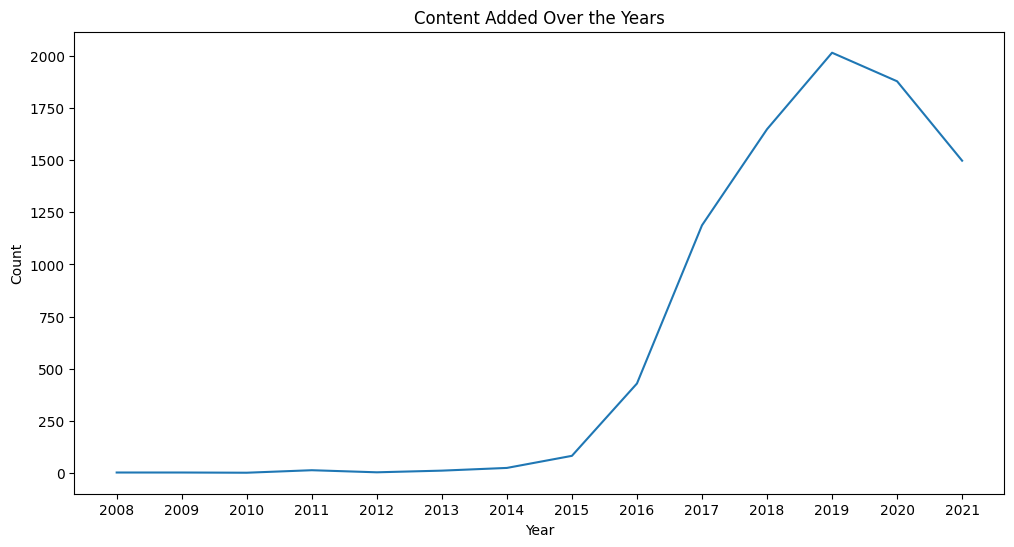

In [17]:
# Content addition over time
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values)
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [18]:
# Define a mapping for ratings to age groups
rating_to_age_group = {
    "TV-MA": "18+ years",
    "TV-14": "13+ years",
    "TV-PG": "10+ years",
    "R": "16+ years",
    "PG-13": "13+ years"
}

# Add the age_group column based on the rating
df["age_group"] = df["rating"].map(rating_to_age_group)

# Display the DataFrame
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,September,13+ years
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,18+ years
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,18+ years
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NaN,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,18+ years
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,18+ years


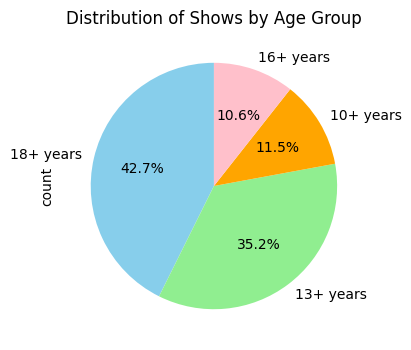

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each age group
age_group_counts = df["age_group"].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
age_group_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightgreen", "orange", "pink", "yellow"],
    labels=age_group_counts.index
)

# Add a title
plt.title("Distribution of Shows by Age Group")

# Show the plot
plt.show()

1. Genre Prediction by Age Group

In [21]:
genres = df['listed_in'].str.get_dummies(sep=', ')
df = pd.concat([df, genres], axis=1)


In [22]:
y = df[genres.columns]  # Multi-label target


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate binary genre columns
genres = df['listed_in'].str.get_dummies(sep=', ')
df = pd.concat([df, genres], axis=1)

# Step 2: Prepare features (X) and target (y)
X = df[['release_year', 'duration', 'year_added', 'month_added']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical columns
y = df[genres.columns]  # Multi-label target (genres)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Decision Tree Classifier
genre_model = DecisionTreeClassifier(max_depth=10, random_state=42)
genre_model.fit(X_train, y_train)

# Step 5: Predictions and evaluation
y_pred = genre_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.06696935300794551


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Prepare data for Decision Tree Classifier
# First, let's create a new column to represent the age rating based on 'rating' column.
df['age_rating'] = df['rating'].apply(lambda x: '13+' if '13' in str(x) else '18+' if '18' in str(x) else 'ALL')

# Features (X) based on the columns that might be predictive of the rating
X = df[['release_year', 'duration', 'year_added', 'month_added']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features

# Target (y) as age rating
y = df['age_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier for Age Rating
age_rating_model = DecisionTreeClassifier(max_depth=10, random_state=42)
age_rating_model.fit(X_train, y_train)

# Predictions and evaluation for Age Rating
y_pred_age_rating = age_rating_model.predict(X_test)
print("Classification Report for Age Rating Prediction:")
print(classification_report(y_test, y_pred_age_rating))

# Prepare the genre prediction model
X_genre = df[['release_year', 'duration', 'year_added', 'month_added']]
X_genre = pd.get_dummies(X_genre, drop_first=True)
y_genre = df[genres.columns]  # Assuming genres is a DataFrame of multi-label target variables

# Train-test split for genre model
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X_genre, y_genre, test_size=0.2, random_state=42)

# Decision Tree Classifier for Genre Prediction
genre_model = DecisionTreeClassifier(max_depth=10, random_state=42)
genre_model.fit(X_train_genre, y_train_genre)

# Predicting the genres
y_pred_genre = genre_model.predict(X_genre)

# Convert the 2D prediction array into genre names
genre_predictions = []
for row in y_pred_genre:
    genres_predicted = [genre for genre, val in zip(genres.columns, row) if val == 1]
    genre_predictions.append(", ".join(genres_predicted))

# Store predicted genres in the DataFrame
df['predicted_genre'] = genre_predictions

# Predict genres for movies/TV shows labeled as '13+' based on features
df_13_plus = df[df['age_rating'] == '13+']

# Display predicted genres for '13+' movies/TV shows
print(df_13_plus[['title', 'age_rating', 'predicted_genre']].head())


Classification Report for Age Rating Prediction:
              precision    recall  f1-score   support

         13+       0.16      0.07      0.10        87
         ALL       0.95      0.98      0.97      1675

    accuracy                           0.94      1762
   macro avg       0.56      0.52      0.53      1762
weighted avg       0.91      0.94      0.92      1762

                   title age_rating                     predicted_genre
0   Dick Johnson Is Dead        13+                                    
9           The Starling        13+  TV Action & Adventure, TV Comedies
27             Grown Ups        13+  Romantic Movies, Romantic TV Shows
28            Dark Skies        13+                                    
29              Paranoia        13+  TV Action & Adventure, TV Comedies


<ipython-input-25-e7acb54ccd52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_documentary'] = filtered_df['listed_in'].str.contains('Documentaries', na=False)
<ipython-input-25-e7acb54ccd52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['is_movie'] = filtered_df['type'] == 'Movie'


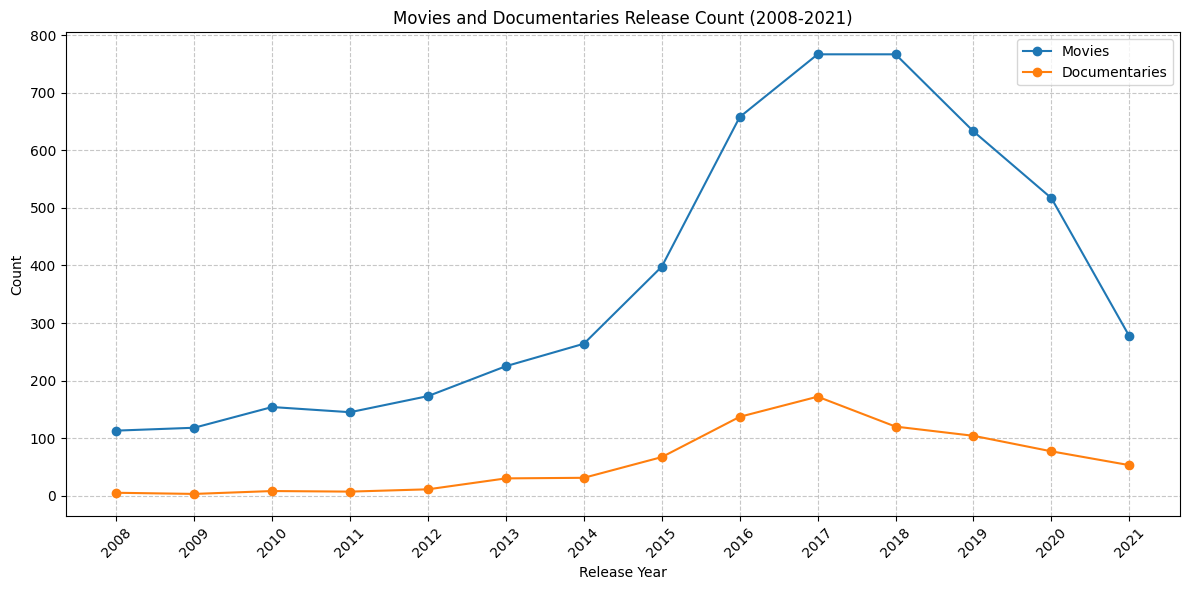

In [25]:
# Filter the DataFrame for the years 2008 to 2020
filtered_df = df[(df['release_year'] >= 2008) & (df['release_year'] <= 2021)]

# Filter for 'Movie' and 'Documentary'
# 'Documentary' is found in 'listed_in', while 'Movie' is identified by 'type'
filtered_df['is_documentary'] = filtered_df['listed_in'].str.contains('Documentaries', na=False)
filtered_df['is_movie'] = filtered_df['type'] == 'Movie'

# Group by year and count for both Movies and Documentaries
movie_counts = filtered_df[filtered_df['is_movie']].groupby('release_year').size()
documentary_counts = filtered_df[filtered_df['is_documentary']].groupby('release_year').size()

# Create a DataFrame for plotting
years = range(2008, 2022)
plot_data = pd.DataFrame({
    'Year': years,
    'Movies': movie_counts.reindex(years, fill_value=0),
    'Documentaries': documentary_counts.reindex(years, fill_value=0),
}).set_index('Year')

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(plot_data.index, plot_data['Movies'], label='Movies', marker='o')
plt.plot(plot_data.index, plot_data['Documentaries'], label='Documentaries', marker='o')

# Add labels, title, and legend
plt.title('Movies and Documentaries Release Count (2008-2021)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(plot_data.index, rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

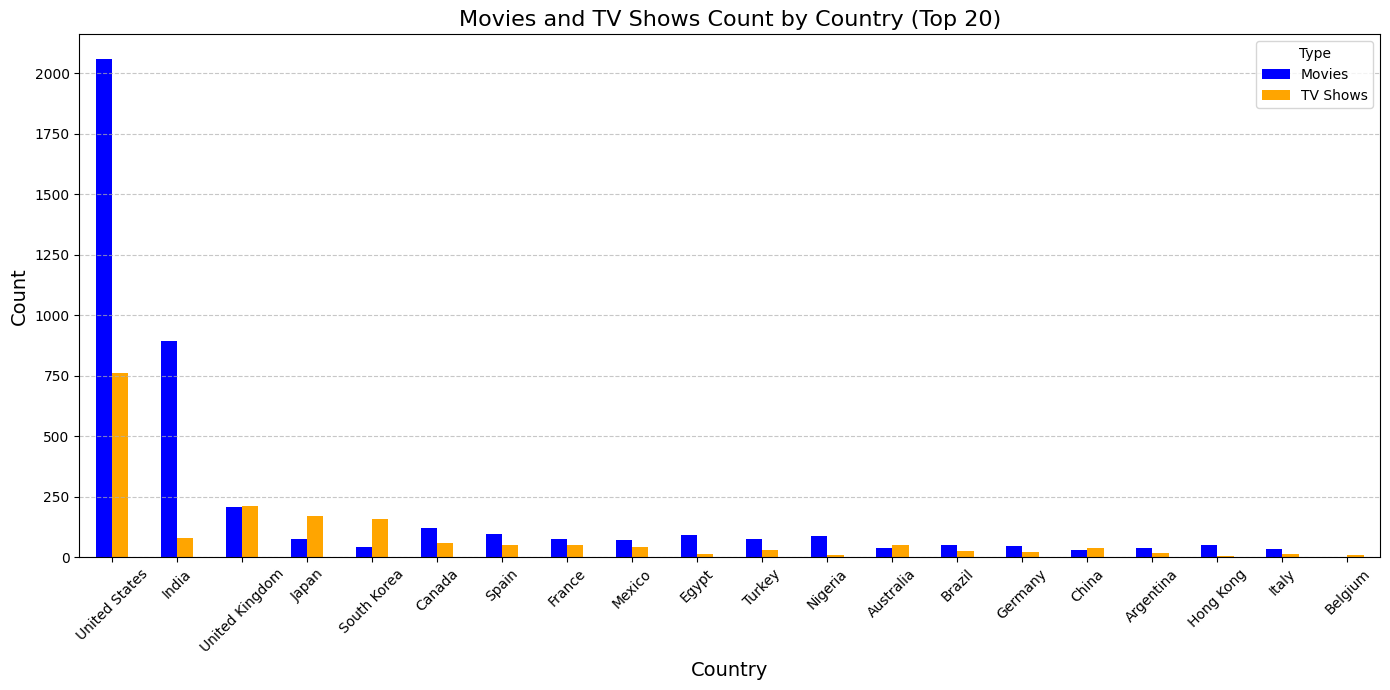

In [26]:
import matplotlib.pyplot as plt

# Step 1: Get country counts as done previously
country_counts = (
    df["country"]
    .dropna()                # Remove NaN values
    .str.split(", ")         # Split by commas
    .explode()               # Flatten lists into rows
    .value_counts()          # Count occurrences
    .reset_index()           # Convert to DataFrame
)

country_counts.columns = ["country", "count"]  # Rename columns

# Get top 20 countries by count
top_20_countries = country_counts.sort_values(by="count", ascending=False).head(20)

# Step 2: Filter the data for top 20 countries and separate Movies/TV Shows
filtered_df = df[df['country'].isin(top_20_countries['country'])]

# Group by 'country' and 'type' (Movie/TV Show) and count occurrences
country_type_counts = filtered_df.groupby(['country', 'type']).size().unstack(fill_value=0)

# Step 3: Calculate total counts per country (sum of Movies and TV Shows)
country_type_counts['total'] = country_type_counts['Movie'] + country_type_counts['TV Show']

# Step 4: Sort the countries based on total count (highest to lowest)
country_type_counts = country_type_counts.sort_values(by='total', ascending=False)

# Step 5: Plot the bar graph for Movies and TV Shows by country
plt.figure(figsize=(14, 7))

# Plot the bars with different colors for Movies and TV Shows
country_type_counts[['Movie', 'TV Show']].plot(
    kind='bar',
    stacked=False,
    color=['blue', 'orange'],  # Blue for Movies and Orange for TV Shows
    figsize=(14, 7)
)

# Customize the plot
plt.title('Movies and TV Shows Count by Country (Top 20)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Type', labels=['Movies', 'TV Shows'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
# Install required libraries
!pip install geopandas plotly plotly-express
!pip install pandas numpy

# Import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [35]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile('/content/ne_110m_admin_0_countries.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [36]:
import geopandas as gpd

# Load the world shapefile
world = gpd.read_file('/content/ne_110m_admin_0_countries.zip')


In [37]:
# Load the Netflix data (adjust as necessary based on your dataset)
import pandas as pd

# Merge the Netflix data with the world shapefile
# Merge with the correct column name
world_data = world.merge(country_counts, how='left', left_on='ADMIN', right_on='country')


# Check the columns of the world map data
world.columns

# View the first few rows to understand the structure
world.head()



,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [38]:
# Check the first few rows of merged data
world_data[['NAME', 'country', 'count']].head()
# Check for NaN values after merge
world_data['count'].isna().sum()
# Fill NaN values in the 'count' column with 0
world_data['count'] = world_data['count'].fillna(0)
# Check the distribution of counts
world_data['count'].describe()


,count
count,177.000000
mean,34.587571
std,115.530075
min,0.000000
25%,0.000000
50%,1.000000
75%,11.000000
max,1046.000000


In [39]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

# Comprehensive country name mapping
name_corrections = {
    # United States variations
    "United States of America": "United States",
    "United States": "United States",

    # United Kingdom variations
    "United Kingdom": "United Kingdom",
    "Great Britain": "United Kingdom",

    # Korea variations
    "South Korea": "South Korea",
    "Republic of Korea": "South Korea",

    # Other common corrections
    "Czech Republic": "Czechia",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Micronesia (Federated States of)": "Micronesia",
    "Iran (Islamic Republic of)": "Iran",
    "North Macedonia": "North Macedonia",
    "United States Virgin Islands": "Virgin Islands",

    # Additional mappings to handle common discrepancies
    "United States Virgin Islands": "Virgin Islands",
    "Trinidad & Tobago": "Trinidad and Tobago",
    "Côte d'Ivoire": "Ivory Coast",
    "São Tomé and Príncipe": "Sao Tome and Principe",
    "Congo": "Republic of the Congo",
    "Democratic Republic of the Congo": "Democratic Republic of Congo"
}



# Prepare country counts
country_counts = (
    df["country"]
    .dropna()                # Remove NaN values
    .str.split(", ")         # Split by commas
    .explode()               # Flatten lists into rows
    .value_counts()          # Count occurrences
    .reset_index()           # Convert to DataFrame
)
country_counts.columns = ["country", "count"]

# Apply name corrections
country_counts['country'] = country_counts['country'].replace(name_corrections)

# Load the world shapefile
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')

# Standardize world map country names
world['NAME'] = world['NAME'].replace(name_corrections)

# Merge the world map with Netflix data
world_data = world.merge(country_counts, how='left', left_on='NAME', right_on='country')

# Fill NaN values with 0
world_data['count'] = world_data['count'].fillna(0)

# Create the map visualization
fig = px.choropleth(
    world_data,
    locations='NAME',  # Location data (country names from world shapefile)
    locationmode='country names',
    color='count',  # Data to visualize (number of shows per country)
    hover_name='NAME',  # Hover text: country name
    color_continuous_scale='Reds',  # Color scale from light to dark red
    projection='natural earth',
    labels={'count': 'Netflix Show Count'},
)

# Update geos to show coastlines and land color
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgrey"
)

# Customize the layout
fig.update_layout(
    title_text='Netflix Shows by Country',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Show the map
fig.show()

# Print some diagnostic information
print("Countries with Netflix shows:")
print(world_data[world_data['count'] > 0][['NAME', 'count']].sort_values('count', ascending=False).head(20))

# Save the figure as an HTML file
fig.write_html("netflix_world_map.html")

Countries with Netflix shows:
               NAME   count
4     United States  3689.0
98            India  1046.0
143  United Kingdom   804.0
3            Canada   445.0
43           France   393.0
155           Japan   318.0
132           Spain   232.0
96      South Korea   231.0
121         Germany   226.0
27           Mexico   169.0
139           China   162.0
137       Australia   160.0
163           Egypt   117.0
124          Turkey   113.0
56          Nigeria   103.0
141           Italy   100.0
29           Brazil    97.0
9         Argentina    91.0
129         Belgium    90.0
8         Indonesia    90.0
